* 신경망 구조 정리
* 이진 분류
* 다중 분류
* 회귀



## 3.1 신경망의 구조

- 네트워크를 구성하는 **층 Layer**
- **입력 데이터** ($X$)와 **타깃** ($y$)
- 학습에 사용할 피드백 신호를 정의하는 **손실 함수 Loss Function**
- 학습 진행 방식을 결정하는 **옵티마이저 Optimizer**

![Fig 3.1](https://github.com/ExcelsiorCJH/Deep-Learning-with-Python/raw/master/Chap01-what_is_deep_learning/images/dnn02.PNG)

### 3.1.1 Layer: 딥러닝의 구성 단위

> 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈

대부분 **가중치** 라는 층의 상태 가짐


**layer compatibility**

각 층의 출력 텐서의 크기와 연결된 층의 입력 텐서의 크기가 동일함

```
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(10))
```
keras 에서는 모델에 추가된 층을 자동으로 상위 층의 크기에 맞추어 주기 때문에 호환성을 걱정하지 않아도 됨.
따라서, 두 번째 층에서 `input_shape` 매개변수를 지정하지 않아도, 앞 층의 출력 크기가 뒷 충의 입력 크기로 자동 채택됨

### 3.1.2 Model: 층의 네트워크

> 층으로 만든 비순환 유향 그래프 (DAG: Directed Acyclic Graph)

네트워크 구조 - hypothesis space 를 정의함

네트워크 구조를 선택함으로써 가능성 있는 가설 공간을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 연산으로 제한

### 3.1.3 Loss Function & Optimizer: 학습 과정을 조절하는 열쇠

> - **loss function / objective function** 훈련하는 동안 최소화 됨. 주어진 문제에 대한 성공 지표
> - **optimizer** : 손실 함수를 기반으로 네트워크가 어떻게 업데이트 될 지 결정

목적 함수를 현명하게 선택하지 않으면 원하지 않는 부수 효과가 발생할 수 있음

#### Guideline

| Problem | Loss Function |
|---------------|-------------------------|
| Binary Classification | Binary Crossentropy ( Logistic loss / Log loss) |
| Multi-class Classification | Categorical Crossentropy |
| Regression | CTC (Connection Temporal Classification) |

## 3.2 케라스 소개

- 동일한 코드로 CPU 와 GPU 에서 실행가능
- 사용하기 쉬운 API를 가지고 있어 딥러닝 모델의 프로토타입을 빠르게 만들 수 있음
- (컴퓨터 비전을 위한) CNN, (시퀀스 처리를 위한) RNN을 지원하며, 이 둘을 자유롭게 조합하여 사용 가능
- 다중 입력이나 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있음. 이 말은 GAN 부터 [Neural Turing Machine](https://bit.ly/28RsmuQ)까지 어떤 딥러닝 모델에도 적합

![Google trends for deep learning frameworks](https://pbs.twimg.com/media/DBa7RkFUQAAYynh.jpg:large)

### 3.2.1 Keras, Tensorflow, Theano, CNTK

![keras backend stack](https://cdn-images-1.medium.com/max/1600/1*OxAgYCBDKyXYLiWWUoKUcQ.png)


### 3.2.2 케라스를 사용한 개발: 빠르게 둘러보기

전형적인 케라스 작업 흐름

1. 입력 텐서와 타깃 텐서로 이루어진 훈련 데이터를 정의
2. 입력과 타깃을 매핑하는 층으로 이루어진 네트워크 (또는 모델)을 정의
    - `Sequential` 클래스: 층을 순서대로 쌓아 올린 네트워크
   ```python
    from keras import models
    from keras import layers

    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
    model.add(layers.Dense(10, activation='softmax'))
    ```
    - 함수형 API: 완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프 생성
    ```python
    input_tensor = layers.Input(shape=(784,))
    x = layers.Dense(32, activation='relu')(input_tensor)
    output_tensor = layers.Dense(10, activation='softmax')(x)
    
    model = models.Model(inputs=input_tensor, outputs=output_tensor)
    ```

3. 손실 함수, 옵티마이저, 모니터링하기 위한 측정 지표를 선택하여 학습과정 설정
    ```python
    from keras import optimizers
    
    model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss='mse',
                  metrics=['accuracy'])
    ```
4. 훈련 데이터에 대해 모델의 fit() 메서드를 반복적으로 호출
    ```python
    model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)
    ```




## 3.4 영화 리뷰 분류: 이진 분류 예제

리뷰 텍스트를 기반으로 리뷰를 긍정(positive)와 부정(negative)으로 분류

### 3.4.1 IMDB 데이터셋

- Internet Movie Database
- 양극단의 리뷰 5만개
- Training Data:25,000개 / Test Data: 25,000개
- 각각 긍정 50% / 부정 50%
- 케라스에 이미 포함되어 있음. 전처리되어 있어 각 리뷰(단어 시퀀스)가 숫자 시퀀스로 변환되어 있음. 각 숫자는 사전에 있는 고유 단어를 의미함



In [58]:
# IMDB 데이터셋 로드
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

print(train_data[0])
print(train_labels[0])

lengths = [len(data) for data in train_data]
print(max(lengths), lengths)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
2494 [218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450

- `num_words=10000`: 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용함
- `train_data`, `test_data`: 리뷰 목록. 단어 인덱스의 리스트. 파이썬 리스트를 원소로 갖는 넘파이 배열
- `train_labels`, `test_labels`: 긍정($1$) / 부정($0$)의 리스트

In [59]:
max([max(sequence) for sequence in train_data])

9999

In [60]:
# 단어로 디코딩
word_index = imdb.get_word_index()  # word_index: 단어:인덱스 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])  # 인덱스:단어 로 뒤집음
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?')    # 리뷰를 디코드. 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺌
                           for i in train_data[0]])

print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### 3.4.2 데이터 준비

 신경망에 숫자 리스트를 주입할 수 없음. 리스트를 텐서로 변경해야 함
 
 * 같은 길이가 되도록 리스트에 패딩을 추가하여 `(samples, sequence_length)` 크기의 정수 텐서로 변환 - 가장 긴 리뷰는 [2494 개 단어](https://colab.research.google.com/drive/1LjRIZA4xY0gs58JfEvfSWABVSJ2ciNXq#scrollTo=GbMgXHAKC56G&line=4&uniqifier=1)로 이루어져 있으므로, 패딩을 추가하여 모든 리뷰를 2494 단어로 정규화
 * one-hot encoding: 단어 위치만 1로 셋하고 나머지는 0으로 지정된 벡터로 표현
 

In [61]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        if i == 0:
            print('sequence: {}'.format(sequence))
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0])

sequence: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
sequence: [1, 591, 202, 14, 31, 6, 717, 10, 10, 2,

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3.4.3 신경망 모델 만들기

입력 데이터: 벨터
레이블: 스칼라

==> relu 활성화 함수를 사용한 완전 연결층 (`Dense(16, activation='relu')`)
```python
output = relu(dot(W, input) + b)
```

16개의 hidden unit -> 가중치 행렬  `W`의 크기가 `(input_dimension(10000), 16)`

hidden unit 의 차원 - 신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도
hidden unit 이 커지면:
- +)더욱 복잡한 표현 학습 가능
- -) 계산 비용 증가 / overfitting 위험

Dense 층을 쌓을 때 아래 두 가지 중요한 구조상의 결정이 필요함
- 얼마나 많은 층을 사용할 것인가? (층의 두께)
- 각 층에 얼마나 많은 은닉 유닛을 둘 것인가? (각 층의 노드 수)

본 문제에서는
- 16개의 은닉 유닛을 가진 2개의 은닉 층
    - `relu` 활성화 함수 사용
    - ![relu](https://cdn-images-1.medium.com/max/1600/1*oePAhrm74RNnNEolprmTaQ.png)
- 감정을 스칼라 값의 예측으로 출력하는 세번째 층
    - `sigmoid` 활성화 함수 사용 (출력값을 확률로 사용 가능)
    - ![sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Error_Function.svg/640px-Error_Function.svg.png)

![fig3-6](https://github.com/jonghoonseo/deep-learning-with-python-notebooks/raw/chap/3/assets/fig_3-6.jpg)



In [0]:
# define model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

손실함수 / 옵티마이저 선택

이진분류 문제 & 출력이 확률 => `binary_crossentropy` 가 적합 (`mean_squared_error` 도 사용 가능)
(확률 출력 모델에서는 `crossentropy`가 적합)

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### 3.4.4 훈련 검증

Validation 을 위해, training data 에서 10,000 개를 이용하여 검증 세트 생성

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

512 샘플 씩 미니 배치 만들어, 20 epoch동안 훈련

동시에 따로 떼 놓은 1만개의 샘플에서 손실과 정확도 측정

In [68]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.5048 - acc: 0.7872 - val_loss: 0.3775 - val_acc: 0.8703
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2991 - acc: 0.9045 - val_loss: 0.3001 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2173 - acc: 0.9285 - val_loss: 0.3083 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.1747 - acc: 0.9440 - val_loss: 0.2826 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1422 - acc: 0.9541 - val_loss: 0.2855 - val_acc: 0.8857
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1147 - acc: 0.9653 - val_loss: 0.3143 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.0977 - acc: 0.9707 - val_loss: 0.3131 - 

In [69]:
history_dict = history.history
print(history_dict.keys())
print(len(history_dict['val_loss']), history_dict['val_loss'])
print(len(history_dict['val_acc']), history_dict['val_acc'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
20 [0.3775028545856476, 0.3000766402244568, 0.30827649059295653, 0.2826080726623535, 0.2855116334915161, 0.31432808408737184, 0.31309323410987855, 0.3859232083320618, 0.36398009305000306, 0.3850135575294495, 0.4169895483493805, 0.45474411635398865, 0.46923727383613584, 0.5026570036888123, 0.5384625560760498, 0.5831503455162048, 0.6145539545059204, 0.6394134777069092, 0.7506313786506653, 0.7019315152168274]
20 [0.8702999997138977, 0.8899000004768371, 0.8715000000953674, 0.8841000001907349, 0.8857000002861023, 0.8778999998092651, 0.8841999999046326, 0.8655999998092652, 0.8778000001907349, 0.8779000000953674, 0.8766999999046325, 0.8697999999046325, 0.8726999997138977, 0.8727999995231629, 0.8698999997138978, 0.8671999996185302, 0.8665999998092652, 0.8677999996185303, 0.853400000667572, 0.8668999996185303]


- `val_loss`, `val_acc`: validation data 의 loss 와 accuracy
- `loss`, `acc`: training data의 loss 와 accuracy

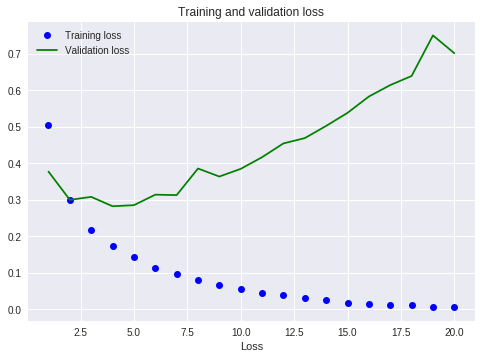

In [70]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()

plt.show()

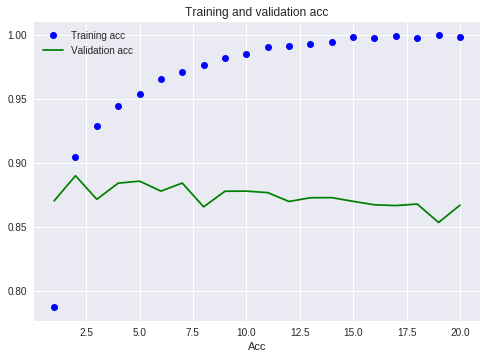

In [71]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.xlabel('Acc')
plt.legend()

plt.show()

두번째 epoch 이후로 loss 가 감소 - overfitting

이를 개선하기 위해 세번째 에포크 이후에 훈련 중지

In [72]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.4737 - acc: 0.8219
Epoch 2/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2674 - acc: 0.9091
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2033 - acc: 0.9281
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


In [73]:
print(results)

[0.3116568111038208, 0.8758]


### 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

모델 훈련 후, 이를 실전 환경에 사용하여 입력 데이터의 label 을 예측

In [74]:
model.predict(x_test)

array([[0.1627791 ],
       [0.99985075],
       [0.39516705],
       ...,
       [0.0824533 ],
       [0.04912925],
       [0.46239877]], dtype=float32)

### 3.4.6 추가 실험

- 현재: 2개의 은닉층. 1 또는 3개의 은닉 층 사용
- 은닉 유닛 수정
- 손실 함수 변경 - `binary_crossentropy` -> `mse`
- 활성화 함수 변경 - `relu` -> `tanh`


In [75]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print('3개 은닉층: ', results)

Epoch 1/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.4548 - acc: 0.8132
Epoch 2/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2543 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.1950 - acc: 0.9303
Epoch 4/4
25000/25000 [==============================] - 2s 73us/step
3개 은닉층:  [0.3014562100696564, 0.88276]


In [76]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print('1개 은닉층: ', results)

Epoch 1/4
25000/25000 [==============================] - 3s 111us/step - loss: 0.4393 - acc: 0.8281
Epoch 2/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.2686 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2131 - acc: 0.9263
Epoch 4/4
25000/25000 [==============================] - 2s 75us/step
1개 은닉층:  [0.2848120026493072, 0.88656]


### 3.4.7 정리
- 원본 데이터를 신경망에 텐서로 주입하려면 전처리가 필요함. 단어 시퀀스는 이진 벡터로 인코딩 될 수 있고 다른 인코딩 방식도 있음 (one-hot encoding)
- `relu` 활성화 함수와 함께 Dense 층을 쌓은 네트워크는 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어 자주 사용됨
- (출력 클래스가 2개인) 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 함. 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값
- 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실함수는 binary_crossentropy임
- rmsprop 옵티마이저는 문제에 산관없이 일반적으로 좋은 선택
- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망이 overfitting 되기 시작하고, 이전에 본적 없는 데이터에서는 결과가 점점 나빠지게 됨. 항상 훈련 세트 이외의 데이터에서 성능 모니터링 필요함

## 3.5 뉴스 기사 분류: 다중 분류 문제

Reuter 뉴스를 46개의 상호 배타적인 토픽으로 분류
single-label, multiclass classification

### 3.5.1 로이터 데이터셋

- 텍스트 분류
- 46개의 토픽
- 각 토픽은 훈련 세트에 최소한 10개의 샘플


In [77]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print([len(train_data), len(test_data)])
print(train_data[0])

[8982, 2246]
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [78]:
### 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

레이블$(y)$: 토픽의 인덱스로 0과 45 사이의 정수

In [79]:
train_labels[10]

3

### 3.5.2 데이터 준비

이전의 예제와 동일한 코드를 사용해서 데이터를 벡터로 변환


In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

레이블을 벡터로 변경
- 레이블의 리스트를 정수 텐서로 변환
- 원-핫 인코딩: 범주형 데이터에 널리 사용되기 때문에 범주형 인코딩이라고 함

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

Keras 에서는 이를 위한 built-in 함수를 제공함

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 3.5.3 모델 구성

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

* **마지막 `Dense` 층의 크기가 46**입니다. 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻입니다. 이 벡터의 각 원소(각 차원)은 각기 다른 출력 클래스가 인코딩된 것입니다.
* **마지막 층에 `softmax` 활성화 함수**가 사용되었습니다. MNIST 예제에서 이런 방식을 보았습니다. 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력합니다. 즉, 46차원의 출력 벡터를 만들며 `output[i]`는 어떤 샘플이 클래스 `i`에 속할 확률입니다. **46개의 값을 모두 더하면 1**이 됩니다.

이런 문제에 사용할 최선의 **손실 함수는 `categorical_crossentropy`**입니다. 이 함수는 두 확률 분포의 사이의 거리를 측정합니다. 여기에서는 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리입니다. 두 분포 사이의 거리를 최소화하면 진짜 레이블에 가능한 가까운 출력을 내도록 모델을 훈련하게 됩니다.

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.5.4 훈련 검증

훈련 데이터에서 1,000개의 샘플을 따로 떼어서 검증 세트로 사용

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

20번의 에포크로 모델을 훈련

![epoch](https://image.slidesharecdn.com/random-171120113837/95/-43-638.jpg?cb=1511177981)

[Batch, Mini-Batch, SGD 정의와 설명 및 예시](http://nonmeyet.tistory.com/entry/Batch-MiniBatch-Stochastic-%EC%A0%95%EC%9D%98%EC%99%80-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EC%98%88%EC%8B%9C)

In [86]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,    # ceil((8982 - 1000) / 512) = 16 iterations
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 224us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 149us/step - loss: 1.4451 - acc: 0.6877 - val_loss: 1.3453 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 148us/step - loss: 1.0952 - acc: 0.7655 - val_loss: 1.1716 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.8696 - acc: 0.8163 - val_loss: 1.0804 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.7031 - acc: 0.8477 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5667 - acc: 0.8800 - val_loss: 0.9413 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.4579 - acc: 0.9045 - val_loss: 0.9062 - val_acc: 0.8020


##### loss / accuracy 그래프

`history.history` 사용

In [0]:
import matplotlib.pyplot as plt

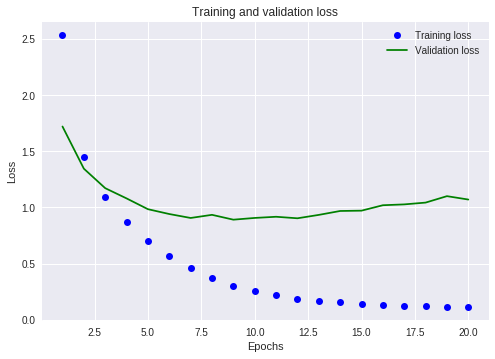

In [88]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

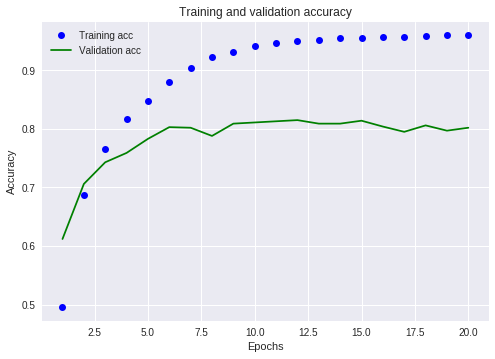

In [89]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이 모델은 9번째 에포크 이후에 과대적합이 시작됩니다. 9번의 에포크로 새로운 모델을 훈련하고 테스트 세트에서 평가하겠습니다:

In [90]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,           # 9번 에포크만 훈련
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 224us/step - loss: 2.5389 - acc: 0.5228 - val_loss: 1.6724 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 148us/step - loss: 1.3717 - acc: 0.7115 - val_loss: 1.2759 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 149us/step - loss: 1.0153 - acc: 0.7794 - val_loss: 1.1323 - val_acc: 0.7490
Epoch 4/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.7994 - acc: 0.8250 - val_loss: 1.0541 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 147us/step - loss: 0.6408 - acc: 0.8617 - val_loss: 0.9756 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.5133 - acc: 0.8920 - val_loss: 0.9095 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 148us/step - loss: 0.4127 - acc: 0.9134 - val_loss: 0.8933 - val_acc: 0.8200
Epoch 8

In [91]:
results

[1.0225692381311078, 0.7764915405695499]

In [92]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.182546749777382

### 3.5.5 새로운 데이터에 대해 예측하기

모델 인스턴스의 `predict` 메서드는 46개 토픽에 대한 확률 분포를 반환

In [0]:
predictions = model.predict(x_test)

`predictions`: $2246 \times  46$
- 2246 개 테스트 데이터
- 각 테스트 데이터마다 46 개의 클래스 확률

In [94]:
print(predictions.shape) 

predictions[0].shape

(2246, 46)


(46,)

이 벡터의 원소 합은 1입니다:

In [95]:
np.sum(predictions[0])

1.0000001

가장 큰 값이 예측 클래스가 됩니다. 즉, 가장 확률이 높은 클래스입니다:

In [96]:
np.argmax(predictions[0])

3

### 3.5.6 레이블과 손실을 다루는 다른 방법

앞서 언급한 것처럼 레이블을 인코딩하는 다른 방법은 다음과 같이 **정수 텐서**로 변환하는 것입니다:

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

이 방법을 적용하기 위해서는 **손실함수** 만 수정하면 됨
- `categorical_crossentropy`: 범주형 인코딩 레이블
- `sparse_categorical_crossentropy`: 정수 레이블

이 손실 함수는 인터페이스만 다를 뿐이고 수학적으로는 `categorical_crossentropy`와 동일합니다.

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

### 3.5.7 충분히 큰 중간층을 두어야 하는 이유

앞서 언급한 것처럼 **마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안 됩니다.** 

46차원보다 훨씬 작은 중간층(예를 들면 4차원)을 두면 **정보의 병목**이 어떻게 나타나는지 확인해 보겠습니다.

In [99]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 270us/step - loss: 2.6572 - acc: 0.3790 - val_loss: 1.9672 - val_acc: 0.5320
Epoch 2/20
7982/7982 [==============================] - 1s 185us/step - loss: 1.6609 - acc: 0.6210 - val_loss: 1.5374 - val_acc: 0.6260
Epoch 3/20
7982/7982 [==============================] - 1s 187us/step - loss: 1.3305 - acc: 0.6671 - val_loss: 1.3917 - val_acc: 0.6790
Epoch 4/20
7982/7982 [==============================] - 1s 187us/step - loss: 1.1411 - acc: 0.7271 - val_loss: 1.3201 - val_acc: 0.6950
Epoch 5/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.0094 - acc: 0.7457 - val_loss: 1.2673 - val_acc: 0.7070
Epoch 6/20
7982/7982 [==============================] - 1s 182us/step - loss: 0.9077 - acc: 0.7587 - val_loss: 1.2761 - val_acc: 0.7070
Epoch 7/20
7982/7982 [==============================] - 1s 183us/step - loss: 0.8271 - acc: 0.7757 - val_loss: 1.2555 - val_acc: 0.7100


검증 정확도의 최고 값은 약 71%로 **8% 정도 감소**되었습니다. 이런 손실의 대부분 원인은 많은 정보(46개 클래스의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.

### 3.5.8 추가 실험

* 더 크거나 작은 층을 사용해 보세요: 32개 유닛, 128개 유닛 등
* 여기에서 두 개의 은닉층을 사용했습니다. 한 개의 은닉층이나 세 개의 은닉층을 사용해 보세요.

In [100]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 269us/step - loss: 1.7315 - acc: 0.6367 - val_loss: 1.1792 - val_acc: 0.7280
Epoch 2/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.9071 - acc: 0.8001 - val_loss: 0.9939 - val_acc: 0.7970
Epoch 3/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.5949 - acc: 0.8712 - val_loss: 0.8553 - val_acc: 0.8240
Epoch 4/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.3961 - acc: 0.9151 - val_loss: 0.9407 - val_acc: 0.8020
Epoch 5/20
7982/7982 [==============================] - 1s 187us/step - loss: 0.2873 - acc: 0.9351 - val_loss: 0.9231 - val_acc: 0.8080
Epoch 6/20
7982/7982 [==============================] - 1s 186us/step - loss: 0.2238 - acc: 0.9466 - val_loss: 0.8809 - val_acc: 0.8290
Epoch 7/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.1920 - acc: 0.9508 - val_loss: 0.9189 - val_acc: 0.8150


### 3.5.9 정리

다음은 이 예제에서 배운 것들입니다.

* N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 `Dense` 층의 크기는 N이어야 합니다.
* 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 `softmax` 활성화 함수를 사용해야 합니다.
* 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 합니다. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화합니다.
* 다중 분류에서 레이블을 다루는 두 가지 방법이 있습니다.
    * 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 `categorical_crossentropy` 손실 함수를 사용합니다.
    * 레이블을 정수로 인코딩하고 `sparse_categorical_crossentropy` 손실 함수를 사용합니다.
* 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 합니다.

## 3.6 주택 가격 예측: 회귀 문제

* 분류(classification) 문제: 입력 데이터 포인트의 개별적인 레이블 하나를 예측
* 회귀(regression) 문제: 개별적인 레이블 대신에 연속적인 값을 예측
    - 예) 기상 데이터가 주어졌을 때 내일 기온을 예측 / 소프트웨어 명세가 주어졌을 때 소프트웨어 프로젝트가 완료될 시간을 예측

### 3.6.1 보스턴 주택 가격 데이터셋

1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측

여기서 사용할 데이터셋은 이전 두 개의 예제와 다릅니다. 데이터 포인트(데이터 갯수)가 506개로 비교적 개수가 적고 404개는 훈련 샘플로 102개는 테스트 샘플로 나누어져 있습니다. 입력 데이터에 있는 각 특성(예를 들어 범죄율)은 스케일이 서로 다릅니다. 어떤 값은 0과 1 사이의 비율을 나타내고 어떤 것은 1과 12 사이의 값을 가지거나 1과 100 사이의 값을 가집니다.


In [0]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [102]:
print('train: ', train_data.shape)
print('test: ', test_data.shape)

train:  (404, 13)
test:  (102, 13)


여기서 볼 수 있듯이 **404개의 훈련 샘플**과 **102개의 테스트 샘플**이 있고 모두 **13개의 수치 특성**을 가지고 있습니다. 13개의 특성은 다음과 같습니다:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

타깃은 주택의 중간 가격으로 천달러 단위입니다:

In [103]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### 3.6.2 데이터 준비

**상이한 스케일**을 가진 값을 신경망에 주입하면 문제가 됩니다. 네트워크가 이런 다양한 데이터에 자동으로 맞추려고 할 수 있지만 이는 확실히 학습을 더 어렵게 만듭니다. 이런 데이터를 다룰 때 대표적인 방법은 **특성별로 정규화**를 하는 것입니다. 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해서 **특성의 평균을 빼고 표준 편차로 나눕니다**. 특성의 중앙이 0 근처에 맞춰지고 표준 편차가 1이 됩니다. 넘파이를 사용하면 간단하게 할 수 있습니다:

In [104]:
print('before: ', train_data[0])

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

print('after: ', train_data[0])

before:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
after:  [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


Test data를 정규화할 때 사용한 값이 Training data에서 계산한 값임을 주목하세요. 머신 러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안 됩니다. 데이터 정규화처럼 간단한 작업조차도 그렇습니다.

## 3.6.3 모델 구성

**샘플의 개수가 적기 때문에** 64개의 유닛을 가진 두 개의 은닉층으로 작은 네트워크를 구성하여 사용하겠습니다. 일반적으로 훈**련 데이터의 개수가 적을수록** 과대적합이 더 쉽게 일어나므로 **작은 모델을 사용**하는 것이 과대적합을 피하는 한 방법입니다.

In [0]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

이 네트워크의 마지막 층은 하나의 유닛을 가지고 있고 **활성화 함수가 없습니다**(선형 층이라고 합니다). 이것이 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성입니다. **활성화 함수를 적용하면 출력 값의 범위를 제한하게 됩니다.** 예를 들어 마지막 층에 `sigmoid` 활성화 함수를 적용하면 네트워크가 0과 1 사이의 값을 예측하도록 학습될 것입니다. **여기서는 마지막 층이 순수한 선형**이므로 네트워크가 어떤 범위의 값이라도 예측하도록 자유롭게 학습됩니다.

이 모델은 **`mse` 손실 함수**를 사용하여 컴파일합니다. 이 함수는 평균 제곱 오차(mean squared error)의 약자로 예측과 타깃 사이 거리의 제곱입니다. 회귀 문제에서 널리 사용되는 손실 함수입니다.

훈련하는 동안 모니터링을 위해 새로운 지표인 **평균 절대 오차(mean absolute error)**를 측정합니다. 이는 예측과 타깃 사이 거리의 절댓값입니다. 예를 들어 이 예제에서 MAE가 0.5이면 예측이 평균적으로 $500 정도 차이가 난다는 뜻입니다.

### 3.6.4 K-fold 검증을 사용한 훈련 검증

(훈련에 사용할 에포크의 수 같은) 매개변수들을 조정하면서 모델을 평가하기 위해 이전 예제에서 했던 것처럼 데이터를 **훈련 세트(Training Set)**와 **검증 세트(Validation Set)**로 나눕니다. 데이터 포인트가 많지 않기 때문에 검증 세트도 매우 작아집니다(약 100개의 샘플). 결국 검증 세트와 훈련 세트로 어떤 데이터 포인트가 선택됐는지에 따라 검증 점수가 크게 달라집니다. 검증 세트의 분할에 대한 검증 점수의 분산이 높습니다. 이렇게 되면 신뢰있는 모델 평가를 신뢰있게 할 수 없습니다.

이런 상황에서 가장 좋은 방법은 **K-겹 교차 검증(K-fold cross validation)**을 사용하는 것입니다. 데이터를 K개의 분할(즉, 폴드)로 나누고(일반적으로 K = 4 또는 5), K개의 모델을 각각 만들어 K - 1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법입니다. 모델의 검증 점수는 K 개의 검증 점수의 평균이 됩니다.

![k-fold](https://github.com/jonghoonseo/deep-learning-with-python-notebooks/raw/chap/3/assets/fig_3-11.png)

In [106]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k # len(train_data): 404
print('number of samples in a fold: ', num_val_samples)
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

number of samples in a fold:  101
처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [107]:
print('scores: ', all_scores)
print('mean score: ', np.mean(all_scores))

scores:  [2.000216493512144, 2.194923370191366, 2.8413101564539542, 2.3510003621035285]
mean score:  2.346862595565248


검증 세트가 다르므로 확실히 검증 점수가 2.0에서 2.8까지 변화가 큽니다. **평균값(2.4)**이 각각의 점수보다 훨씬 신뢰할 만한 점수입니다. 이것이 K-겹 교차 검증의 핵심입니다. 이 예에서는 평균적으로 3,000달러 정도 차이가 납니다. 주택 가격의 범위가 10,000달러에서 50,000달러 사이인 것을 감안하면 비교적 큰 값입니다.

신경망을 조금 더 오래 **500 에포크** 동안 훈련해 보죠. 각 에포크마다 모델이 얼마나 개선되는지 기록하기 위해 훈련 루프를 조금 수정해서 에포크의 검증 점수를 로그에 저장하겠습니다:

In [0]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [109]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


그 다음 모든 폴드에 대해 에포크의 MAE 점수의 평균을 계산합니다:
$$
\text{average_mae_history}_{epoch} = \frac{1}{4}\sum^4_i{\text{mae_history}_{epoch, i}}
$$

In [110]:
print(len(all_mae_histories), len(all_mae_histories[0]))

average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

print(len(average_mae_history))

4 500
500


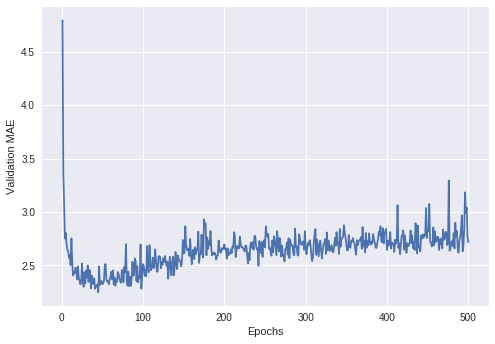

In [111]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

이 그래프는 범위가 크고 변동이 심하기 때문에 보기가 좀 어렵습니다. 다음처럼 해 보죠:

* 곡선의 다른 부분과 스케일이 많이 다른 첫 10개 데이터 포인트를 제외시킵니다.
* 부드러운 곡선을 얻기 위해 각 포인트를 이전 포인트의 지수 이동 평균으로 대체합니다.

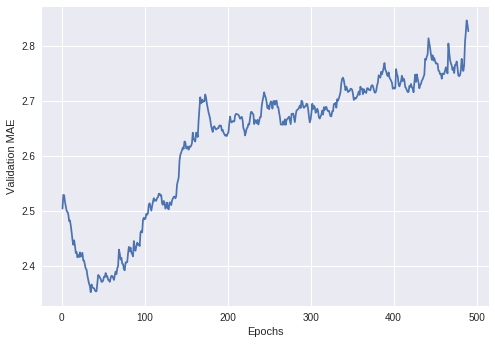

In [112]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

이 그래프를 보면 검증 MAE가 **80번째 에포크** 이후에 줄어드는 것이 멈추었습니다. **이 지점 이후로는 과대적합**이 시작됩니다.

모델의 다른 매개변수에 대한 튜닝이 끝나면(에포크 수뿐만 아니라 은닉층의 크기도 조절할 수 있습니다) 모든 훈련 데이터를 사용하고 최상의 매개변수로 최종 실전에 투입될 모델을 훈련시킵니다. 그다음 테스트 데이터로 성능을 확인합니다:

In [113]:
# 새롭게 컴파일된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)         # 80 epoch 만 학습
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 835us/step


In [114]:
test_mae_score

2.6836693053152048

아직 2,675달러 정도 차이가 나네요.

### 3.6.5 정리

다음은 이 예제에서 배운 것들입니다.

* 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용합니다. **평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수**입니다.
* 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다릅니다. 당연히 정확도 개념은 회귀에 적용되지 않습니다. **일반적인 회귀 지표는 평균 절대 오차(MAE)**입니다.
* 입력 데이터의 특성이 서로 다른 범위를 가지면 **전처리 단계에서 각 특성을 개별적으로 스케일 조정**해야 합니다.
* **가용한 데이터가 적다면 K-겹 검증을 사용**하는 것이 신뢰할 수 있는 모델 신뢰있게 평가 방법입니다.
* **가용한 훈련 데이터가 적다면** 과대적합을 피하기 위해 **은닉층의 수를 줄인 모델**이 좋습니다(일반적으로 하나 또는 두 개).

세 개의 예제 시리즈를 마칩니다. 이제 벡터 데이터 입력을 받는 일반적인 문제를 다룰 수 있습니다:

* 이진 분류
* 단일 레이블 다중 분류
* 스칼라 회귀

다음 장에서 이 예제들에서 보았던 데이터 전처리, 모델 평가, 과대접과 같은 개념에 대해 조금 더 이론적인 설명을 보완하겠습니다.

## 3.7 요약

- 이진 분류, 다중 분류, 스칼라 회귀 문제
- 원본 데이터를 신경망에 주입하기 전에 **전처리** 해야 함
- 데이터에 범위가 다른 특성이 있으면 전처리 단계에서 각 특성을 독립적으로 **스케일 조정**해야 함
- 훈련이 진행됨에 따라 **과대적합**이 시작되고 새로운 데이터에 대해 나쁜 결과를 얻게 됨
- 훈련 데이터가 많지 않으면 과대적합을 피하기 위해 **1개 또는 2개의 은닉층**을 가진 신경망을 사용
- 데이터가 많은 범주로 나뉘어 있을 때, **중간층이 너무 작으면 정보의 병목 발생** 가능
- 회귀는 분류와 다른 손실 함수와 평가 지표를 사용 - `mse`, `mae`
- 적은 데이터를 사용할 때는 **K-fold cross validatio**n 이 신뢰할 수 있는 모델 평가를 도와줌